<a href="https://colab.research.google.com/github/LeilaMo/Machine_Learning_Toturials/blob/main/Logistic_Regression_bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn import datasets
from numpy import array
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score


This is a data set related to a bank direct marketing, and we want to predict if a client will subscribe to a term deposite or not. 

The problem is a classification problem and i just use LogisticRegression to predict the probabilty of the subsciption. 

## Part 1 - Importing the Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
ls /content/drive/My\ Drive/propulsion_data

banking.csv  winequality-white.csv


In [ ]:
df = pd.read_csv('/content/drive/My Drive/propulsion_data/banking.csv')

## Part 2 - Preprocessing 

### Cleaning and Exploring the Data 

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
df.isnull().sum() # to see if there is a missing value
# there is no missing value since they are labeled with "unknown" or nonexistent

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

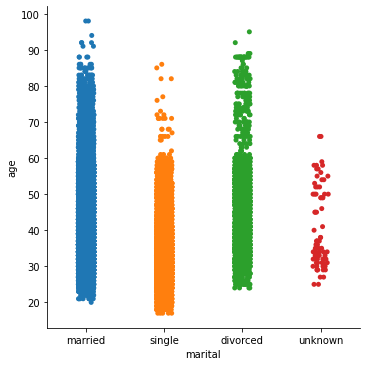

In [ ]:
sns.catplot(x="marital", y="age", data=df)
plt.show(sns)

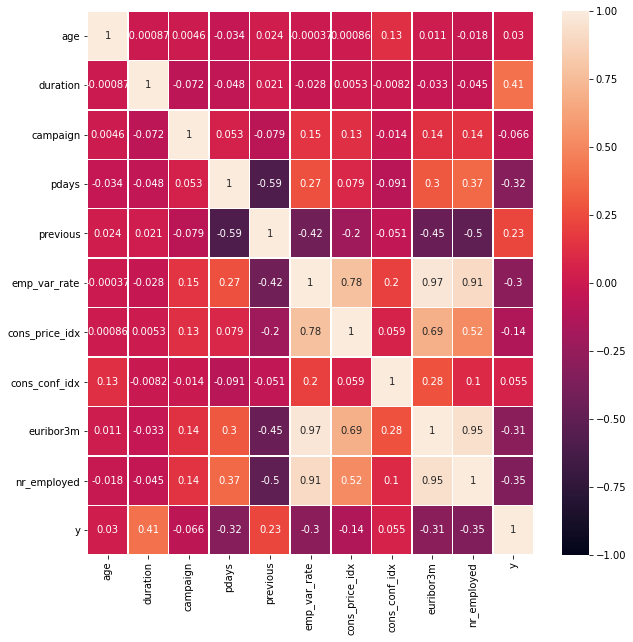

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, ax=ax)
plt.show(sns)

In [ ]:
 df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
#df["marital"].replace("unknown",'NAN', inplace=True)
#df.loc[df [col] == "unknown", 'set_of_numbers'] = 999

In [ ]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [ ]:
df =df.drop(["duration"], axis= 1)

In [ ]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [ ]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
#df = df.dropna(subset=['job', 'marital', "housing", "loan"]) # removes the missing data from these columns

In [ ]:
df.shape

(41188, 20)

Important note: sometimes the most appropriate way to impute a missing numeric feature is with zeros. However the same thing can be applied to the categorical values, and a missing value itself is a valuable information that should be explicitly encoded. The missing valuse from the main data set are encoded as “unknown“ or “nonexistent“ and here they remain the same. 

### Splitting the X and the Y variables

In [ ]:
x = df.iloc[ : , :-1]
y= df.iloc[ : , -1]

In [ ]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

### Get Dummy variables

In [ ]:
x = pd.get_dummies(x)


In [ ]:
x.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
x.iloc[: , :9]

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...
41183,59,1,999,0,1.4,94.465,-41.8,4.866,5228.1
41184,31,2,999,0,1.1,93.994,-36.4,4.860,5191.0
41185,42,3,999,0,1.1,93.994,-36.4,4.857,5191.0
41186,48,2,999,0,-3.4,92.431,-26.9,0.742,5017.5


### Splitting the training and the test data sets

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(x, y , test_size = 0.2, random_state = 0)

In [ ]:
x_train.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
29321,34,7,999,0,-0.1,93.200,-42.0,4.076,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
23925,30,7,999,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
39148,35,2,999,0,1.4,94.465,-41.8,4.967,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
12078,44,1,999,0,-0.2,92.756,-45.9,3.053,5176.3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
41021,46,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
pd.value_counts(y_test)

0    7325
1     913
Name: y, dtype: int64

In [ ]:
len(x_train)

32950

### Scaling the data set

Scaling has to be done after preparing the training and the test sets. Otherwise it causes information leakage, and overfitting. In addition, we have to apply data scaling just on the numerical variables. Therefore, in the following section the numerical and the categorical variables are seperated. After scaling the numerical variables the two datasets are concatenated.  

In [ ]:
x_train_num = x_train.iloc[ : , :9]
x_test_num = x_test.iloc[ : , : 9]

In [ ]:
x_train_num.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
29321,34,7,999,0,-0.1,93.200,-42.0,4.076,5195.8
23925,30,7,999,0,1.4,93.444,-36.1,4.963,5228.1
39148,35,2,999,0,1.4,94.465,-41.8,4.967,5228.1
12078,44,1,999,0,-0.2,92.756,-45.9,3.053,5176.3
41021,46,2,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
sc = StandardScaler()
x_train_num = pd.DataFrame(sc.fit_transform(x_train_num),
                            columns=['age', 'campaign', 'pdays',
                                     'previous', 'emp_var_rate',
                                     'cons_price_idx', 'cons_conf_idx',
                                     'euribor3m', 'nr_employed',],
                            index=x_train.index.copy())

x_test_num = pd.DataFrame(sc.transform(x_test_num), 
                          columns=['age', 'campaign', 'pdays',
                                     'previous', 'emp_var_rate',
                                     'cons_price_idx', 'cons_conf_idx',
                                     'euribor3m', 'nr_employed'], 
                          index=x_test.index.copy() )

In [ ]:
x_train_num.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
29321,-0.579855,1.605990,0.195164,-0.351355,-0.113026,-0.644318,-0.320825,0.264337,0.399076
23925,-0.963853,1.605990,0.195164,-0.351355,0.841832,-0.222943,0.954400,0.775827,0.846637
39148,-0.483855,-0.204451,0.195164,-0.351355,0.841832,1.540268,-0.277597,0.778134,0.846637
12078,0.380141,-0.566539,0.195164,-0.351355,-0.176683,-1.411081,-1.163770,-0.325578,0.128876
41021,0.572140,-0.204451,0.195164,-0.351355,0.650860,0.726877,0.889558,0.714702,0.332565


In [ ]:
x_train['age'] = x_train_num['age']

In [ ]:
cols = x_train_num.columns
for col in cols:
  x_train[col] = x_train_num[col]
  x_test[col] = x_test_num[col]


In [ ]:
x_train.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
29321,-0.579855,1.605990,0.195164,-0.351355,-0.113026,-0.644318,-0.320825,0.264337,0.399076,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
23925,-0.963853,1.605990,0.195164,-0.351355,0.841832,-0.222943,0.954400,0.775827,0.846637,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
39148,-0.483855,-0.204451,0.195164,-0.351355,0.841832,1.540268,-0.277597,0.778134,0.846637,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
12078,0.380141,-0.566539,0.195164,-0.351355,-0.176683,-1.411081,-1.163770,-0.325578,0.128876,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
41021,0.572140,-0.204451,0.195164,-0.351355,0.650860,0.726877,0.889558,0.714702,0.332565,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### Balancing the Training Data

In classification tasks, the categoricanl data points have to be balanced, otherwise the signal from one variable is stronger than the other one. Therefore, the model will not be able to get the main pattern in the data, and the predictions would not be correct. 

Here i balanced the data using upsampling method. 





In [ ]:
# concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)

In [ ]:
X.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
29321,-0.579855,1.605990,0.195164,-0.351355,-0.113026,-0.644318,-0.320825,0.264337,0.399076,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
23925,-0.963853,1.605990,0.195164,-0.351355,0.841832,-0.222943,0.954400,0.775827,0.846637,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
39148,-0.483855,-0.204451,0.195164,-0.351355,0.841832,1.540268,-0.277597,0.778134,0.846637,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
12078,0.380141,-0.566539,0.195164,-0.351355,-0.176683,-1.411081,-1.163770,-0.325578,0.128876,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
41021,0.572140,-0.204451,0.195164,-0.351355,0.650860,0.726877,0.889558,0.714702,0.332565,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


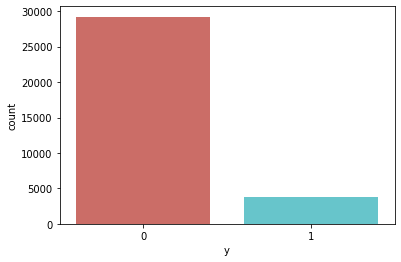

In [ ]:
sns.countplot(x= "y", data = X , palette="hls")

In [ ]:
# separate minority and majority classes
majority = X[X.y==0]
minority = X[X.y==1]

# upsample minority
minority_upsampled = resample(minority,
                          replace=True, # sample with replacement
                          n_samples=len(majority), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([majority, minority_upsampled])



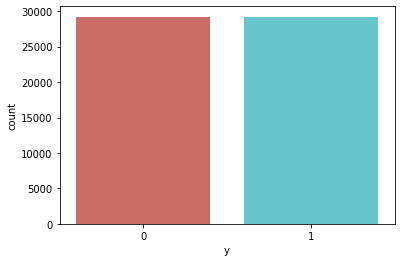

In [ ]:
sns.countplot(x= "y", data = upsampled , palette="hls")

In [ ]:
y_train= upsampled.y
x_train= upsampled.drop("y", axis= 1)

## Part 3 - Model Selection 

I have tried three different logstic regression models usch as LogisticRegression, Lasso Regression and Ridge Regession models. 

In [ ]:
models = [LogisticRegression(class_weight = 'balanced', 
                             solver = 'liblinear',
                              C = 1000000000),
                             
                LogisticRegression(class_weight = 'balanced',    
                             solver = 'liblinear',
                             penalty = "l1", C = 0.1),
               

               LogisticRegression(class_weight = 'balanced',
                             solver = 'liblinear',
                             penalty = "l2", C = 1, max_iter=1000
                            )]

In [ ]:



    # Define a result table as a DataFrame
result_table = pd.DataFrame(columns=["classifiers", "accuracy" , 
                                     "precision", "recall" , 
                                      ])

result_cm_roc = pd.DataFrame(columns=["classifiers", "confusion_matrix" , 
                                     'fpr','tpr','auc', 
                                      ])
    # Train the models and record the results
for cls in models:
    model = cls.fit(x_train, y_train)


    y_pred = model.predict(x_test)
    yproba = model.predict_proba(x_test)[::,1]
    
    print(
          classification_report(y_test, y_pred))
    print ("-------------------------------------------------------------")

    cm = metrics.confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    

    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        "accuracy" : metrics.accuracy_score(y_test, y_pred),
                                        "precision" : metrics.precision_score(y_test, y_pred),
                                        "recall": metrics.recall_score(y_test, y_pred),
                                        }, ignore_index=True)
    
    result_cm_roc = result_cm_roc.append({'classifiers':cls.__class__.__name__,
                                         "confusion_matrix": cm, 
                                         'fpr':fpr, 
                                         'tpr':tpr, 
                                         'auc':auc}, ignore_index=True)
    y_pred = 0
    yproba = 0
    cm = 0 

# Set name of the classifiers as index labels
# result_table.set_index('classifiers', inplace=True)


              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7325
           1       0.34      0.62      0.44       913

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.83      0.85      8238

-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7325
           1       0.34      0.62      0.44       913

    accuracy                           0.83      8238
   macro avg       0.64      0.74      0.67      8238
weighted avg       0.88      0.83      0.85      8238

-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7325
           1       0.34      0.62      0.44       913

    accuracy                           0.83      8238
   m

In [ ]:
result_table

,classifiers,accuracy,precision,recall
0,LogisticRegression,0.826171,0.343013,0.62103
1,LogisticRegression,0.825443,0.341772,0.62103
2,LogisticRegression,0.825929,0.342598,0.62103


In [ ]:
result_table["classifiers"][1] = "LassoRegression"
result_table["classifiers"][2] = "RidgeRegression"

In [ ]:
result_table

,classifiers,accuracy,precision,recall
0,LogisticRegression,0.826171,0.343013,0.62103
1,LassoRegression,0.825443,0.341772,0.62103
2,RidgeRegression,0.825929,0.342598,0.62103


According to the above table the performance of the three calssifiers are not different than each other. 



### Confusion Matrix

In [ ]:
result_cm_roc


,classifiers,confusion_matrix,fpr,tpr,auc
0,LogisticRegression,"[[6239, 1086], [346, 567]]","[0.0, 0.0, 0.0, 0.00013651877133105802, 0.0001...","[0.0, 0.001095290251916758, 0.0109529025191675...",0.794530
1,LogisticRegression,"[[6233, 1092], [346, 567]]","[0.0, 0.0, 0.0, 0.00013651877133105802, 0.0001...","[0.0, 0.001095290251916758, 0.0109529025191675...",0.795003
2,LogisticRegression,"[[6237, 1088], [346, 567]]","[0.0, 0.0, 0.0, 0.00013651877133105802, 0.0001...","[0.0, 0.001095290251916758, 0.0109529025191675...",0.794557


In [ ]:
result_cm_roc["classifiers"][1] = "LassoRegression"
result_cm_roc["classifiers"][2] = "RidgeRegression"

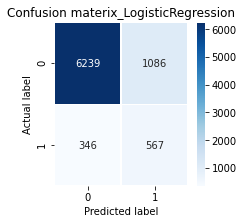

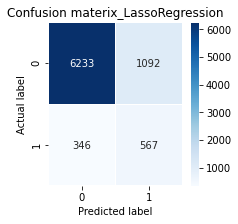

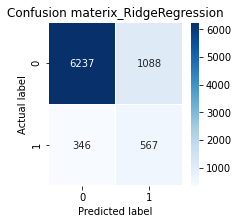

In [ ]:

i = 0
for cm in result_cm_roc.confusion_matrix:
   plt.figure(figsize=(3,3))
   sns.heatmap(cm, annot=True, linewidths=.5, fmt ='d', cmap='Blues');
   plt.ylabel('Actual label');
   plt.xlabel('Predicted label');
   plt.title("Confusion materix_" + result_cm_roc["classifiers"][i])
   i = i + 1


In [ ]:
result_cm_roc.drop(["confusion_matrix"], axis=1)

,classifiers,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0, 0.0, 0.00013651877133105802, 0.0001...","[0.0, 0.001095290251916758, 0.0109529025191675...",0.794530
1,LassoRegression,"[0.0, 0.0, 0.0, 0.00013651877133105802, 0.0001...","[0.0, 0.001095290251916758, 0.0109529025191675...",0.795003
2,RidgeRegression,"[0.0, 0.0, 0.0, 0.00013651877133105802, 0.0001...","[0.0, 0.001095290251916758, 0.0109529025191675...",0.794557


### ROC Curve

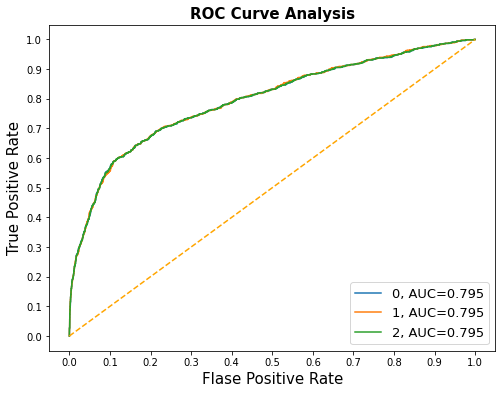

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_cm_roc.index:
     plt.plot(result_cm_roc.loc[i]['fpr'], 
              result_cm_roc.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_cm_roc.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()